# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [135]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000
          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


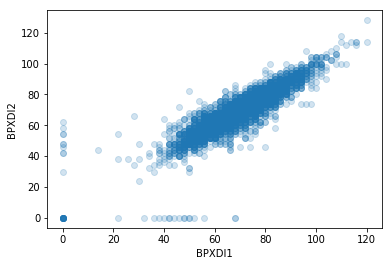

In [11]:
# enter your code here
sns.regplot(x = da["BPXDI1"], y = da["BPXDI2"],fit_reg=False, scatter_kws={"alpha": 0.2})
print(da[["BPXSY1", "BPXSY2"]].dropna().corr())
print(da[["BPXDI1", "BPXDI2"]].dropna().corr())

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


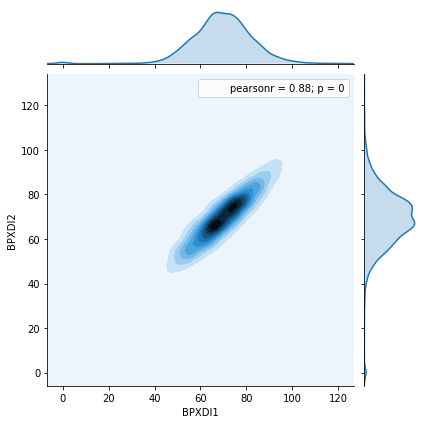

In [16]:
sns.jointplot(x=da["BPXDI1"], y=da["BPXDI2"], kind='kde', data=da).annotate(stats.pearsonr)

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation coeficient between repeated measurements of systolic blood pressure is 0.96, which is stronger than the correlation coef between repeated measurements of diastolic blood pressure, 0.88. 

In [17]:
print(da[["BPXSY1", "BPXDI1"]].dropna().corr())
print(da[["BPXSY2", "BPXDI2"]].dropna().corr())

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000
          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

The second systolic and second diastolic blood pressure measure less correlated than the first systolic and first diastolic blood pressure measure.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

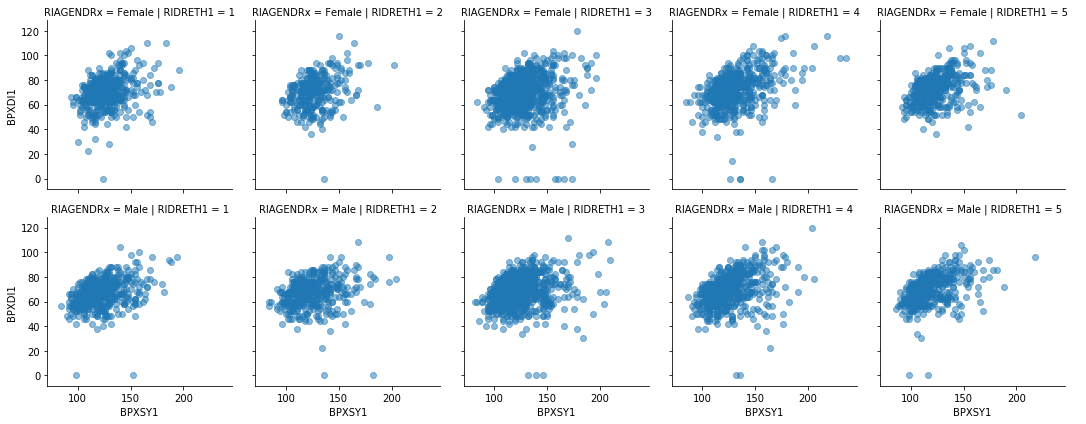

In [108]:
# insert your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({2: "Male", 1: "Female"}) 
_ = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

In [105]:

grouped = da.groupby(['RIAGENDRx', 'RIDRETH1'])

# Compute the correlation for each group
corr_matrix = grouped['BPXSY1', 'BPXDI1'].corr()

aux = corr_matrix.drop(columns='BPXSY1')
auxb = aux.unstack().unstack()
auxb 


BPXDI1                                                           \
             BPXSY1                                         BPXDI1             
RIDRETH1          1         2         3         4         5      1    2    3   
RIAGENDRx                                                                      
Female     0.302742  0.306427  0.207470  0.423597  0.370852    1.0  1.0  1.0   
Male       0.351912  0.239737  0.241947  0.378335  0.438976    1.0  1.0  1.0   

                     
                     
RIDRETH1     4    5  
RIAGENDRx            
Female     1.0  1.0  
Male       1.0  1.0

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

Al the correlations are positive. There is a stronger correlation between the first measurements of systolic and diastolic blood pressure in the ethnicity group number 4 and 5. However, all the correlation values are smaller than 0.44. 

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [3]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDEDUC2x != "Refused"), :]

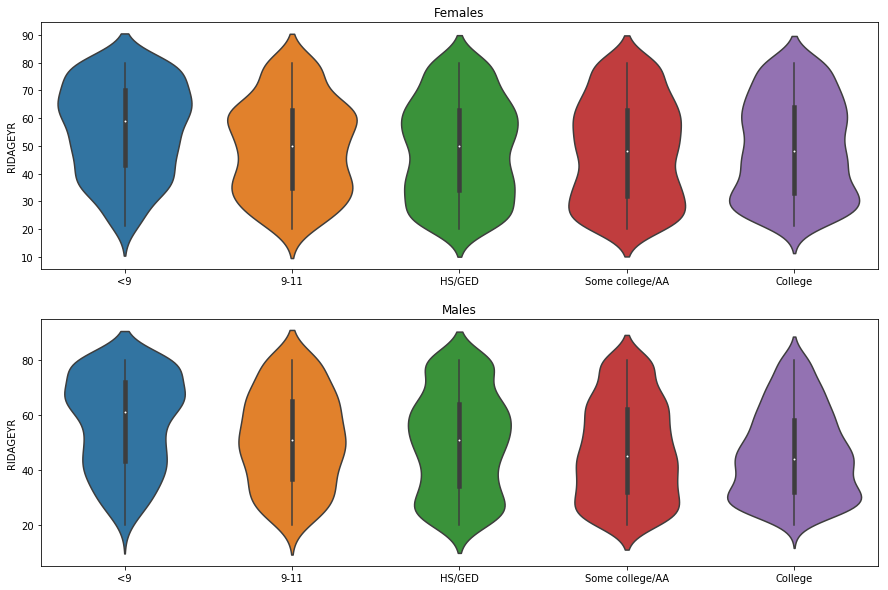

In [133]:
plt.figure(figsize=(15,10))
females = db.loc[da['RIAGENDRx'] == 'Female']
males   = db.loc[da['RIAGENDRx'] == 'Male']


plt.subplot(2,1,1)
a = sns.violinplot(females.DMDEDUC2x, females.RIDAGEYR, order = ["<9","9-11","HS/GED","Some college/AA","College"] )
plt.title("Females")
plt.xlabel("")

plt.subplot(2,1,2)
b = sns.violinplot(males.DMDEDUC2x, males.RIDAGEYR, order = ["<9","9-11","HS/GED","Some college/AA","College"])
plt.title("Males")
plt.xlabel("")

plt.show()

#a = sns.FacetGrid(db, col="DMDEDUC2x",  row="RIAGENDRx").map(sns.violinplot, 'RIDAGEYR').add_legend()

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

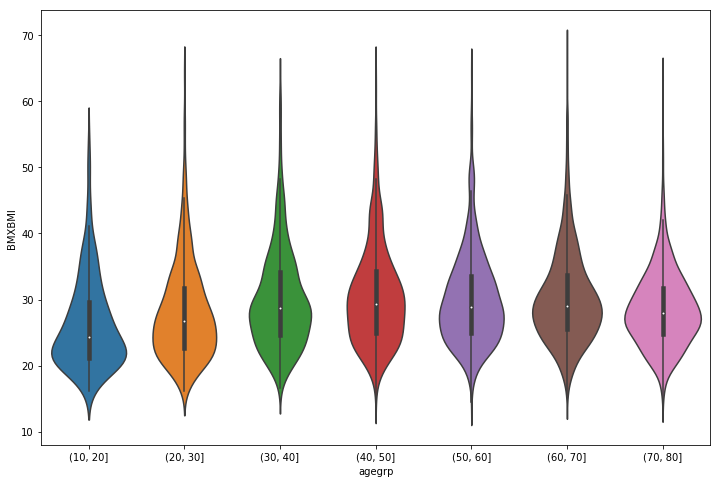

In [4]:
# insert your code here
plt.figure(figsize=(12,8))

db["agegrp"] = pd.cut(db.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
a = sns.violinplot(db.agegrp, db.BMXBMI ) #, order = ["<9","9-11","HS/GED","Some college/AA","College"]
#BMXBMI

__Q5a.__ Comment on the trends in BMI across the demographic groups.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [7]:
# insert your code here
pd.crosstab(db['RIDRETH1'],db['HIQ210']).apply(lambda x: x/sum(x), axis = 1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.138187,0.857355,0.004458
2,0.128920,0.871080,0.000000
3,0.067354,0.931432,0.001214
4,0.108758,0.890279,0.000962
5,0.081761,0.915723,0.002516


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Mexican-americans have the highest rate of being uninsured in the past year.